<a href="https://colab.research.google.com/github/Emadalnajaar/modules/blob/master/Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data


In [1]:
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris #MultiClassifier   
from sklearn.datasets import load_boston #Regression
from sklearn.datasets import load_wine #MultiClassifier
from sklearn.datasets import load_breast_cancer #BinaryClassifier
from sklearn.datasets import load_diabetes #MultiClassifer
from sklearn.metrics import confusion_matrix , classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Datasets

In [0]:
#Either
X, y = load_breast_cancer(return_X_y=True)
#OR
dat= load_breast_cancer()
X = dat.data
y = dat.target

dat.feature_names
sns.countplot(y)

0


<Figure size 432x288 with 0 Axes>

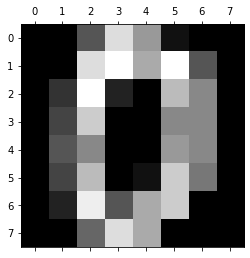

1


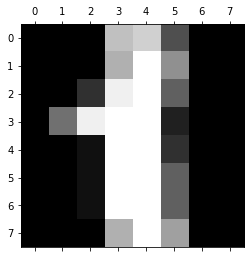

2


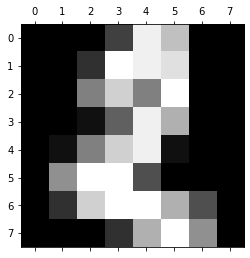

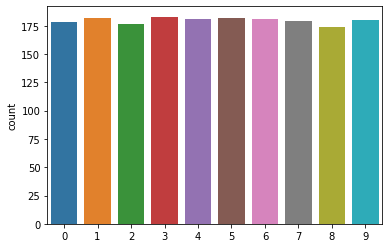

In [68]:
from sklearn.datasets import load_digits #MultiClassifier
dat= load_digits()
X = dat.data
y = dat.target
plt.gray()
n = 3
for ima in range(n):
  print(ima)
  plt.matshow(dat.images[ima])
  plt.show()
sns.countplot(y)

In [87]:
from sklearn.datasets import make_regression 
X,y = make_regression(n_samples=10000, n_features = 500 , shuffle = True)
print(X.shape , y.shape)
X[:10]

(10000, 500) (10000,)


array([[-1.42771665,  0.07647808,  0.11413718, ...,  0.25062562,
        -0.5769087 , -0.44143802],
       [-0.78291687, -0.42962431, -1.99185055, ..., -0.03168753,
        -0.06793291,  0.93706584],
       [ 1.15169046, -1.5312303 , -1.20095176, ..., -1.05178643,
        -0.26785952, -0.64245586],
       ...,
       [-0.48827306,  0.51854247, -0.052461  , ..., -0.26209603,
         0.15673153, -0.38997239],
       [ 0.88141744, -0.83142166, -0.94460958, ...,  0.82551235,
        -0.62383923,  1.11237591],
       [-0.04023741,  1.80677907,  0.46707545, ..., -0.64152983,
        -0.62212026, -0.868323  ]])

(100, 20) (100,)


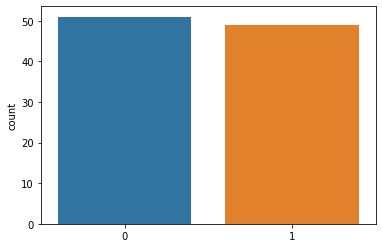

In [90]:
from sklearn.datasets import make_classification #two classes
X,y = make_classification(n_samples=100, n_features = 20 , shuffle = True)
print(X.shape , y.shape)
sns.countplot(y)

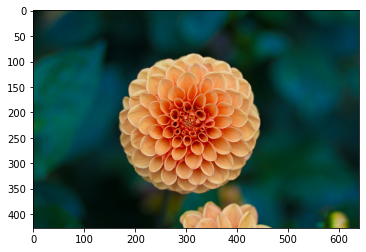

In [95]:
from sklearn.datasets import load_sample_image #image
china = load_sample_image('china.jpg') #flower
china.dtype
china.shape
plt.imshow(china)


#Cleaning data and missing values  

In [0]:
from sklearn.impute import SimpleImputer

In [18]:
data = [[1,2,np.nan],
        [3,np.nan,4],
        [1,2,3],
        [5,2,np.nan]]
var =  np.nan # you can used any values need replace , example : 0,np.nan,x
impute = SimpleImputer(missing_values = var , strategy = 'mean').fit_transform(data)
print(impute)
# strategy = mean, median, most_frequent
#wrong : space 

[[1.  2.  3.5]
 [3.  2.  4. ]
 [1.  2.  3. ]
 [5.  2.  3.5]]


**اذا اردت انت تملئ الحقول الفارغة بقيمة معينة**

In [15]:
data = [[1,2,np.nan],
        [3,np.nan,4],
        [1,2,3],
        [5,2,np.nan]]
imp = SimpleImputer( strategy='constant' , fill_value = 10).fit_transform(data)
print(imp)

[[ 1.  2. 10.]
 [ 3. 10.  4.]
 [ 1.  2.  3.]
 [ 5.  2. 10.]]


In [16]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
imputelbc = SimpleImputer(missing_values = np.nan , strategy = 'median').fit_transform(X)
print(imputelbc)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [26]:
imputermodel = SimpleImputer(missing_values= 0 , strategy = 'most_frequent').fit_transform(X) ; print(imputermodel)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.564e-02 2.871e-01 7.039e-02]]


In [52]:
from sklearn.preprocessing import PolynomialFeatures
n = 1 #equation squert n becouse add more feature 
#equation x_0 + x_1 ,x_0 ^2 + x_1 ^2 x_0 * x_1 ...
ploy = PolynomialFeatures(degree = n)
xx = ploy.fit_transform(X)
xx.shape

(569, 31)

#Feature selections

In [5]:
from sklearn.feature_selection import SelectPercentile 
from sklearn.feature_selection import chi2, f_classif
X,y = load_breast_cancer(return_X_y=True)
fs = SelectPercentile(score_func = f_classif, percentile =20) #chie , f_classif
X = fs.fit_transform(X,y)
fs.get_support() #selected feature are :

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [7]:
from sklearn.feature_selection import GenericUnivariateSelect , SelectKBest # selectKbest diffirance math score_func = chi2,k = 5 
model = GenericUnivariateSelect(score_func = chi2, mode='k_best',param = 5 )
X = model.fit_transform(X,y)
model.get_support()

array([ True, False,  True,  True,  True,  True])

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression 
X,y = load_breast_cancer(return_X_y=True)
rfc = RandomForestClassifier(n_estimators=20)
lr = LinearRegression()
FS = SelectFromModel(estimator = lr) #switch name model only
FS.fit(X,y)
sfm= FS.transform(X)
FS.get_support()

array([False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True])

**Technical**

In [0]:
from sklearn.feature_selection import SelectPercentile ,chi2
for i in range(10,100,5):
  r=0
  sel = SelectPercentile(score_func = chi2 , percentile= i )
  sel.fit(X,y)
  sel_feature = sel.transform(X)
  sfeature = sel.get_support()
  X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2,random_state=33,shuffle=False)
  ModelLogisticRegression.fit(X_train,y_train)
  res = ModelLogisticRegression.predict(X_test)
  print('--',i)
  print('accuracy = ',accuracy_score(y_test,res))
  print('_______________________')

#Data scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , Normalizer , Binarizer #MaxAbsScaler , FunctionTransformer , PolynomialFeature 


StandardScaler -> z = (x - u)/s


In [0]:
X,y = load_iris(return_X_y=True)

In [4]:
ss = StandardScaler() #optional copy=True, with_mean=True, with_std=True
modelss = ss.fit_transform(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
mms = MinMaxScaler(feature_range = (0,1))
X = mms.fit_transform(X)
X

array([[0.54598853, 0.73111332, 0.62077552, 0.66831017, 0.45069799,
        0.91202749],
       [0.61578329, 0.34875746, 0.60690146, 0.53981772, 0.43521431,
        0.63917526],
       [0.59574321, 0.63568588, 0.55638563, 0.50844166, 0.37450845,
        0.83505155],
       ...,
       [0.44578813, 0.26351889, 0.39309854, 0.3799492 , 0.23073142,
        0.48728522],
       [0.66553797, 0.7554672 , 0.63358236, 0.66831017, 0.402035  ,
        0.91065292],
       [0.02853984, 0.        , 0.05428673, 0.04357787, 0.02049744,
        0.        ]])

In [9]:
norm = Normalizer(norm ='max') #l1,l2,max
X = norm.fit_transform(X)
X

array([[0.57129576, 0.02484366, 0.59865359, ..., 1.        , 0.65618904,
        0.45926682],
       [1.        , 0.42381387, 0.95745715, ..., 0.99382839, 0.36319924,
        0.34654441],
       [0.72030952, 0.46734887, 0.71342088, ..., 1.        , 0.48345027,
        0.25559264],
       ...,
       [0.73281297, 1.        , 0.71758056, ..., 0.78437801, 0.20720035,
        0.24452587],
       [0.70780462, 0.72860944, 0.73083604, ..., 1.        , 0.5459179 ,
        0.49669347],
       [0.07351377, 1.        , 0.05690647, ..., 0.        , 0.51332036,
        0.20075327]])

In [15]:
bi = Binarizer(threshold=1.0)
X = bi.fit_transform(X)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [5]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

#Split Data

In [0]:
from sklearn.model_selection import train_test_split #, KFold , TimeSeriesSplit , ShuffleSplit
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2,random_state=33,shuffle=False)

In [23]:
ax,ay = np.arange(15).reshape((5,3)),range(5)
ay=list(ay)
print(ax)
print(ay)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[0, 1, 2, 3, 4]


#Metrics

In [0]:
from sklearn.metrics import confusion_matrix , classification_report , f1_score , accuracy_score , roc_curve 
from sklearn.metrics import mean_absolute_error , mean_squared_error , median_absolute_error

#Algorithm

#linear_model

In [0]:
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso , SGDRegressor , LogisticRegression , SGDClassifier

**LinearRegression**

In [0]:
modelLR = LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=-1).fit(X_train,y_train) #n_jobs = -1 ,mean run all computation cpumode

In [34]:
modelmodelLR.score(X_train,y_train)
y_pred = modelLR.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred,multioutput='uniform_average')

0.19976062892771168

In [37]:
modelLR.intercept_ #intercept with line x 
modelLR.coef_ #parameter use in equation

array([ 1.65870138e-01, -1.72587914e-02, -1.54978769e-02, -3.46640953e-04,
       -8.97143351e-01,  3.94975696e+00, -1.22035769e+00, -1.26884756e+00,
        2.43145283e-01, -1.30278942e+00, -3.68213873e-01, -2.33070004e-02,
        2.90149664e-02,  6.97679636e-05, -1.41345480e+01,  8.30402654e-01,
        3.57911690e+00, -1.20043497e+01, -5.40282116e-01,  4.66446576e+00,
       -1.87661551e-01,  9.27221866e-04, -1.20258139e-03,  1.14681704e-03,
       -8.05972310e-01, -1.79262318e-01, -4.13909492e-01, -6.23187501e-01,
       -5.28724808e-01, -3.48464110e+00])

**Ridge Regression**

In [0]:
model = Ridge(alpha=0)  # if increase alpha increase regularization  

**Lasso Regression**

هذه نفس عمل الريدغ ولكن , ال لاسو لا تستخدم التربيع عند حساب معادلة الخطا على عكس ريدغ

**SGDRegression**

loss = squard_loss or huber or epsilon_insensitive or squared_epsilon_insensitive -> this for calculate cost_function 

penaslty = None , l1,l2,elasticnet -> a way calculate regularization 

learning_rate = parameter learn 

max_iter = number max iterater try

alpha = regularization



In [0]:
modelSGDR = SGDRegressor(fit_intercept=True,loss = 'huber',penalty='l1',learning_rate=0.1,alpha=1.0,random_state=0,n_jobs=-1).fit(X_train,y_train)

#Logistic Regression

tol = مقدار سماحيى بالخطأ

In [31]:
%%time
ModelLogisticRegression = LogisticRegression(penalty='l2',solver = 'saga', C =10 ,tol = 0.0001 ,random_state=0).fit(X_train,y_train)
ModelLogisticRegression.score(X_train,y_train)
ModelLogisticRegression.classes_
ModelLogisticRegression.n_iter_
y_pred = ModelLogisticRegression.predict(X_test)
ConfusionMatrix = confusion_matrix(y_pred , y_test)
fpr,tpr,threshold = roc_curve(y_pred,y_test)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)
print(accuracy_score(y_pred,y_test))

fpr [0.         0.07142857 1.        ]
tpr [0. 1. 1.]
threshold [2 1 0]
0.9824561403508771
CPU times: user 31.1 ms, sys: 3.12 ms, total: 34.2 ms
Wall time: 32.4 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
modelsgdclassifier = SGDClassifier( penalty = 'l2' , loss = 'squared_loss',learning_rate='optimal',random_state=0 ).fit(X_train,y_train)
modelsgdclassifier.score(X_train,y_train)
print(modelsgdclassifier.loss_function_)

#NeuralNetwork

**MLPRegressor**

In [0]:
from sklearn.neural_network import MLPRegressor

**parameters**
hidden_layer_size= (number_neurons , number layers ) 
---
activation = ('relu' , 'tanh' , 'logistic' , 'identity')
---
solver  = a way work optimization ('sgd','adam','lbfgs')
---
epsilon = تستخدم مع ادم في سولفر 

alpha = reguler

batch_size = size mini batch

early_stopping =  الايقاف المبكر Treu,False

learning_rate = 'constant' , 'adaptive' 

learning_rate_init = used with adam , sgd , default 0.001

max_iter ,shuffle 


**attributes**
loss_float
The current loss computed with the loss function.

coefs_list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_int,
The number of iterations the solver has ran.

n_layers_int
Number of layers.

n_outputs_int
Number of outputs.

out_activation_string
Name of the output activation function.


In [25]:
modelmlpregressor = MLPRegressor(hidden_layer_sizes = (200,4),activation = 'identity',solver ='sgd',max_iter = 2000,learning_rate = 'adaptive',alpha = 0.01 ,random_state=0)
modelmlpregressor.fit(X_train,y_train)
modelmlpregressor.score(X_train,y_train)
#modelmlpregressor.n_layers_

0.9130532975966785

**MPLClassifier**

classes_: ndarray or list of ndarray of shape (n_classes,)
Class labels for each output.

loss_: float
The current loss computed with the loss function.

coefs_: list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_: list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_: int,
The number of iterations the solver has ran.

n_layers_: int
Number of layers.

n_outputs_: int
Number of outputs.

out_activation_: string
Name of the output activation function.

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
X,y = load_breast_cancer(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state =20)


In [23]:
modelmlpregressor = MLPClassifier(hidden_layer_sizes = (200,4),activation = 'logistic',solver ='adam',max_iter = 2000,learning_rate = 'constant',alpha = 0.001 ,random_state=0)
modelmlpregressor.fit(X_train,y_train)
modelmlpregressor.score(X_train,y_train)
#modelmlpregressor.loss_

0.9538461538461539

#GRAPH

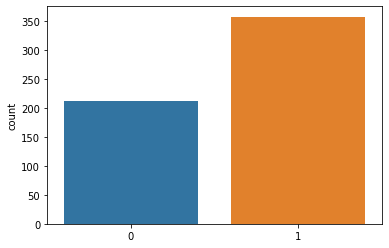

In [16]:
sns.countplot(y)

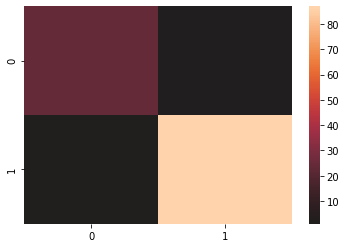

In [21]:
sns.heatmap(ConfusionMatrix , center = False)
plt.show()

In [0]:
sns.concat()

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_train,y_train, s=1 , c='r', marker = '*',label = "real data")
ax1.scatter(X_test,y_pred, s=10 , c='r', marker = '*',label = "predict data ")
plt.show()

#Techincal

In [0]:
GeneratData = np.arange(0,1,0.05).reshape(-1,1)